In [79]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [80]:
data = pd.read_csv('Salary Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [81]:
print(data[['YearsExperience', 'Salary']].corr())

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [82]:
X = data[['YearsExperience']]  
y = data['Salary']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
knn = KNeighborsRegressor(n_neighbors=2)  # Start with K=5 (tune later)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=2)

In [84]:
y_pred = knn.predict(X_test_scaled)
print("Predictions:", y_pred[:5])


Predictions: [111275.5  63570.  105366.5  73696.   57297.5]


In [85]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 5601.833333333333
Mean Squared Error (MSE): 39991976.166666664
R² Score: 0.9217065509837155


In [86]:
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best R² Score:", grid_search.best_score_)


Best K: 2
Best R² Score: 0.9332794354573675


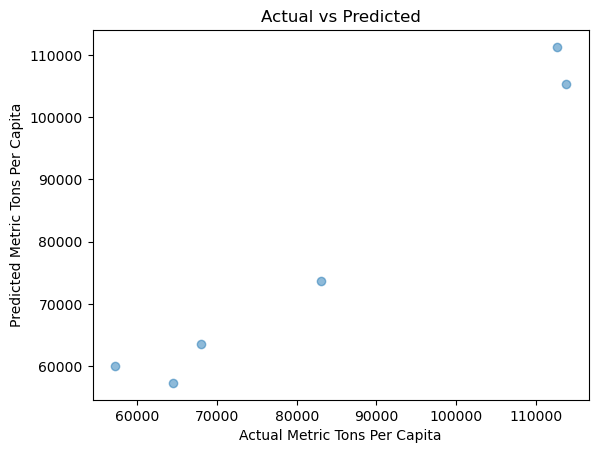

In [87]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Metric Tons Per Capita")
plt.ylabel("Predicted Metric Tons Per Capita")
plt.title("Actual vs Predicted")
plt.show()
